## Image Classification with CNN for Cifar-10 Data

<img src='cifar.jpg' width=500>

In [1]:
#Paketleri Yükleme

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

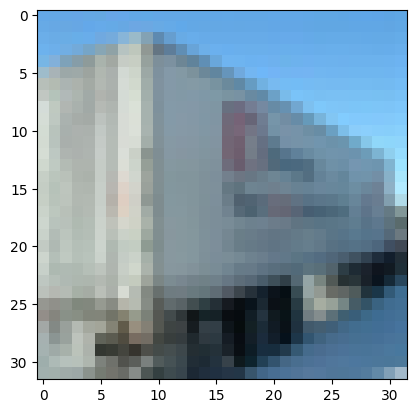

In [8]:
plt.imshow(x_train[15],cmap='gray');
#Bu bir kamyon

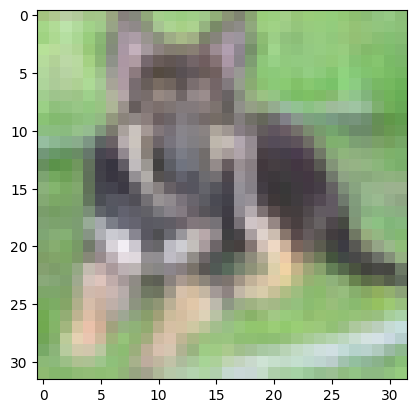

In [9]:
plt.imshow(x_train[156],cmap='gray');
#Bu da bir köpek

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
x_train=x_train/255.0
x_test=x_test/255.0
#Resimleri normalize ediyoruz.

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_test.shape

(10000, 32, 32, 3)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [15]:
model=Sequential()
model.add(InputLayer(input_shape=(32,32,3))) #resmin boyutlarını 32,32 istiyor.Input shape olarak veriyoruz.
model.add(Reshape(target_shape=(32,32,3))) 
model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))   
model.add(Flatten())
model.add(Dense(10)) 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [16]:
model.fit(x_train,y_train, validation_split=.20, epochs=20,batch_size=45,verbose=1)

Epoch 1/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3449 - loss: 1.8405 - val_accuracy: 0.5142 - val_loss: 1.4146
Epoch 2/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5262 - loss: 1.3591 - val_accuracy: 0.5475 - val_loss: 1.3149
Epoch 3/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5630 - loss: 1.2613 - val_accuracy: 0.5631 - val_loss: 1.2570
Epoch 4/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.5856 - loss: 1.1985 - val_accuracy: 0.5736 - val_loss: 1.2299
Epoch 5/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6034 - loss: 1.1479 - val_accuracy: 0.5726 - val_loss: 1.2342
Epoch 6/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.6114 - loss: 1.1297 - val_accuracy: 0.5765 - val_loss: 1.2256
Epoch 7/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6227 - loss: 1.0900 - val_accuracy: 0.5792 - val_loss: 1.2209
Epoch 8/20
889/889 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6299 - loss: 1.0752 - val_a

In [17]:
loss,accuracy=model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6031 - loss: 1.1721


In [18]:
#Modelimizi tekrar eğitiyoruz.

In [19]:
model=Sequential()
model.add(InputLayer(input_shape=(32,32,3))) 
model.add(Reshape(target_shape=(32,32,3))) 
model.add(BatchNormalization())
model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))   
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(60)) 
model.add(Dropout(.25))
model.add(BatchNormalization())
model.add(Dense(10))
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [20]:
history=model.fit(x_train,y_train, validation_split=.20, epochs=40,batch_size=45,verbose=1)

Epoch 1/40
889/889 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.3985 - loss: 1.7266 - val_accuracy: 0.5472 - val_loss: 1.2836
Epoch 2/40
889/889 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.5441 - loss: 1.3013 - val_accuracy: 0.5628 - val_loss: 1.2330
Epoch 3/40
889/889 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.5785 - loss: 1.1950 - val_accuracy: 0.5818 - val_loss: 1.1867
Epoch 4/40
889/889 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.6040 - loss: 1.1405 - val_accuracy: 0.5880 - val_loss: 1.1651
Epoch 5/40
889/889 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.6180 - loss: 1.0944 - val_accuracy: 0.6055 - val_loss: 1.1309
Epoch 6/40
889/889 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.6357 - loss: 1.0495 - val_accuracy: 0.6158 - val_loss: 1.1138
Epoch 7/40
889/889 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.6434 - loss: 1.0312 - val_accuracy: 0.6150 - val_loss: 1.1058
Epoch 8/40
889/889 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.6507 - loss: 1.0055 - 

In [21]:
loss,accuracy=model.evaluate(x_test, y_test)
#Başarı oranımız biraz daha arttı.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6170 - loss: 1.1343


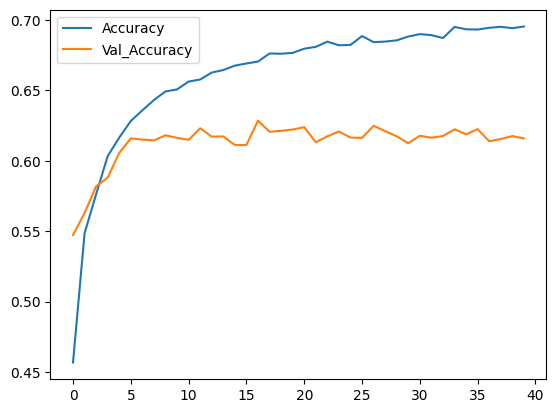

In [22]:
plt.plot(history.history['accuracy'],label='Accuracy') #Bizim eğitim için verdiğimiz data
plt.plot(history.history['val_accuracy'],label='Val_Accuracy') #Bu da hiç görmediği data
plt.legend()